In [1]:
import os
import logging
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import spectral_embedding, TSNE
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt
import similarity

plt.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'dejavusans',
    'font.serif': ['simsun', 'AR PL UMing CN'],
    'axes.unicode_minus': False,
})

In [2]:
prefix = 'D:\git\zhongguoyuyan\csv'
words = pd.read_csv(os.path.join(prefix, 'words.csv'), index_col=0)
location = pd.read_csv(
    os.path.join(prefix, 'dialect', 'location.csv'),
    encoding='utf-8',
    index_col=0
)

sample = location.sample(100)
ids, data = similarity.load_data(os.path.join(prefix, 'dialect'), sample.index)
data = pd.concat([words, data.set_index(data.index.astype(int).rename('cid'))], axis=1, join='inner')

405  0369    NaN  连读调，后字变调  NaN  NaN    有
586  0587    uat       k  NaN  NaN    刮
576  0545    NaN     (无)  NaN  NaN    篾
801  0752    iau       ɕ  NaN  NaN    削


In [3]:
features = data.values[:, 2::3]
onehot, _ = similarity.encode_features(features)
valid = (features != '').astype(np.int32)
sim = (onehot * onehot.T).A / np.dot(valid, valid.T)
dist = similarity.sim2dist(sim)

In [4]:
svd = TruncatedSVD(2)
pc = svd.fit_transform(sim)
pc /= np.sqrt(svd.singular_values_)
se = spectral_embedding(sim, n_components=2)
tsne = TSNE(2).fit_transform(dist)

In [5]:
n_clusters = 50
labels = spectral_clustering(sim, n_clusters=n_clusters)

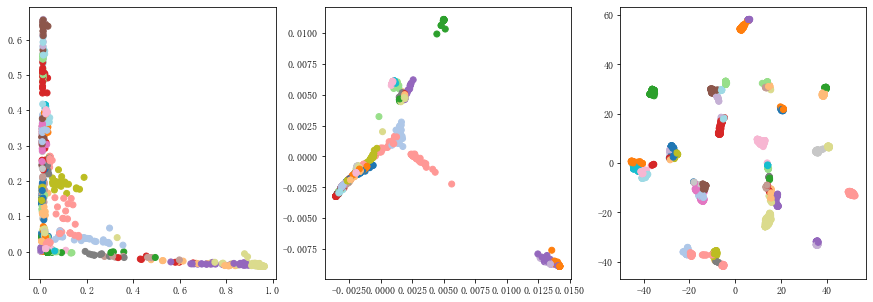

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(pc[:, 0], pc[:, 1], c=labels % 20, cmap='tab20')
ax2.scatter(se[:, 0], se[:, 1], c=labels % 20, cmap='tab20')
ax3.scatter(tsne[:, 0], tsne[:, 1], c=labels % 20, cmap='tab20')
plt.show()

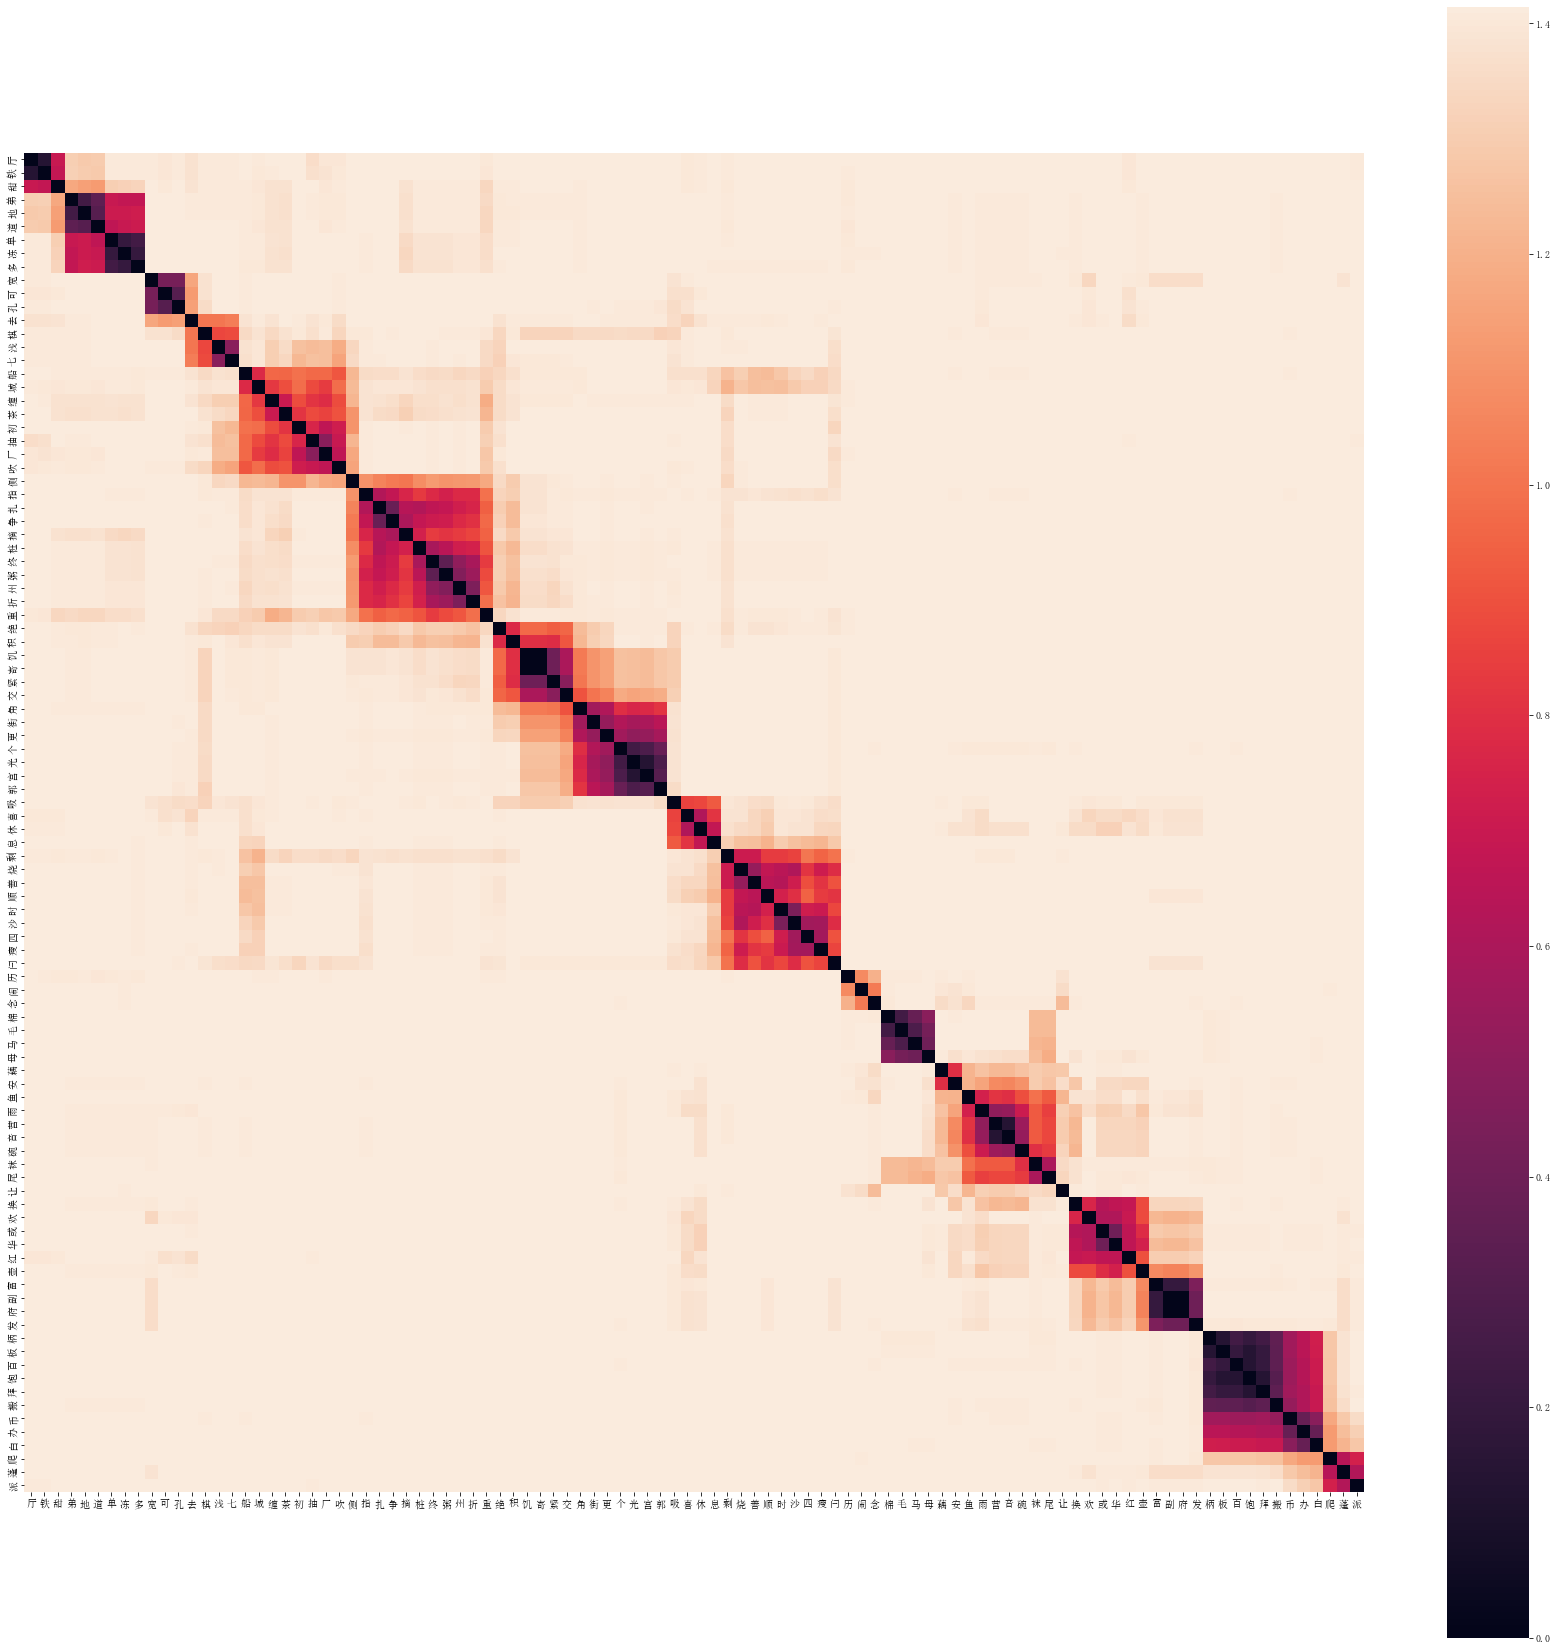

In [7]:
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
idx = idx[:100]
plt.figure(figsize=(30, 30))
similarity.plot_heatmap(dist[idx, :][:, idx], data.iloc[idx]['item'].values)
plt.show()